# importing Libraries

In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for providing the path
import os
print(os.listdir)

<built-in function listdir>


In [2]:
data = pd.read_csv('amazon_alexa.tsv', delimiter = '\t', quoting = 3)

In [3]:
data.shape

(3150, 5)

In [4]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
# Describing the data set
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
# Checking if there is any null or not
data.isnull().any().any()

False

In [7]:
# Adding a lenght column for analyzing the lenght of the reviews
data['length'] = data['verified_reviews'].apply(len)
data.groupby('length').describe().sample(10) 

rating                                              feedback            \
        count      mean       std  min  25%  50%  75%  max    count      mean   
length                                                                          
425       1.0  5.000000       NaN  5.0  5.0  5.0  5.0  5.0      1.0  1.000000   
199       1.0  4.000000       NaN  4.0  4.0  4.0  4.0  4.0      1.0  1.000000   
152       9.0  4.333333  0.707107  3.0  4.0  4.0  5.0  5.0      9.0  1.000000   
180       4.0  3.000000  2.309401  1.0  1.0  3.0  5.0  5.0      4.0  0.500000   
67       13.0  4.923077  0.277350  4.0  5.0  5.0  5.0  5.0     13.0  1.000000   
83       13.0  4.769231  0.438529  4.0  5.0  5.0  5.0  5.0     13.0  1.000000   
162       2.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0      2.0  1.000000   
675       2.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0      2.0  0.000000   
320       2.0  5.000000  0.000000  5.0  5.0  5.0  5.0  5.0      2.0  1.000000   
41       11.0  4.454545  1.293340  1.0  5.0  5.0  5.0  5.0     11.0  0.909091   

                                           
             std  min  25%  50%  75%  max  
length                                     
425          NaN  1.0  1.0  1.0  1.0  1.0  
199          NaN  1.0  1.0  1.0  1.0  1.0  
152     0.000000  1.0  1.0  1.0  1.0  1.0  
180     0.577350  0.0  0.0  0.5  1.0  1.0  
67      0.000000  1.0  1.0  1.0  1.0  1.0  
83      0.000000  1.0  1.0  1.0  1.0  1.0  
162     0.000000  1.0  1.0  1.0  1.0  1.0  
675     0.000000  0.0  0.0  0.0  0.0  0.0  
320     0.000000  1.0  1.0  1.0  1.0  1.0  
41      0.301511  0.0  1.0  1.0  1.0  1.0

In [8]:
# Describing the data according to the rating
data.groupby('rating').describe()

feedback                                     length              \
          count mean  std  min  25%  50%  75%  max   count        mean   
rating                                                                   
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   161.0  195.658385   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    96.0  250.020833   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   152.0  208.098684   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   455.0  179.338462   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  2286.0  109.006562   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.928219  1.0  36.00  120.0  284.00  1126.0  
2       270.179472  1.0  78.75  165.0  311.25  1688.0  
3       272.582517  1.0  54.00  131.0  286.00  1956.0  
4       216.415268  1.0  34.50  100.0  242.00  1362.0  
5       152.505019  1.0  27.00   65.0  136.00  2853.0

In [9]:
# Describing the data according to the feedback
data.groupby('feedback').describe()

rating                                               length  \
           count      mean       std  min  25%  50%  75%  max   count   
feedback                                                                
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0   257.0   
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0  2893.0   

                                                                   
                mean         std  min   25%    50%    75%     max  
feedback                                                           
0         215.964981  236.895519  1.0  53.0  137.0  291.0  1688.0  
1         125.274456  175.036515  1.0  29.0   70.0  155.0  2853.0

## Data Visualizations

In [10]:
rating = data['rating'].value_counts()

label_rating = rating.index
size_rating = rating.values

colors = ['pink','lightblue','aqua','gold','crimson']

rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         marker = dict(colors= colors),
                         name = 'Alexa', hole=0.3)

df = [rating_piechart]
layout = go.Layout(title = 'Distribution of Rating for Alexa')

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

Dengan melihat diagram lingkaran di atas, kita dapat menyimpulkan bahwa sebagian besar Peringkat bagus untuk alexa. Sekitar 72,6% orang telah memberikan peringkat Alexa 5 Star, yang sangat bagus. 14,4% orang telah memberi Alexa Peringkat Bintang 4, yang juga bagus. itu berarti 72,6+14.4 = 87% orang telah memberikan peringkat alexa yang baik.

4,38% orang telah memberi alexa peringkat rata-rata 3 bintang. 3,05% orang tidak menyukai alexa dan memilih untuk memberikan hanya 2 peringkat bintang untuk alexa sedangkan 5,11% orang membenci alexa dan memutuskan untuk memberikan alexa hanya 1 Peringkat Bintang. Ini total 3,05+5,11 = 8,16% orang tidak suka alexa.

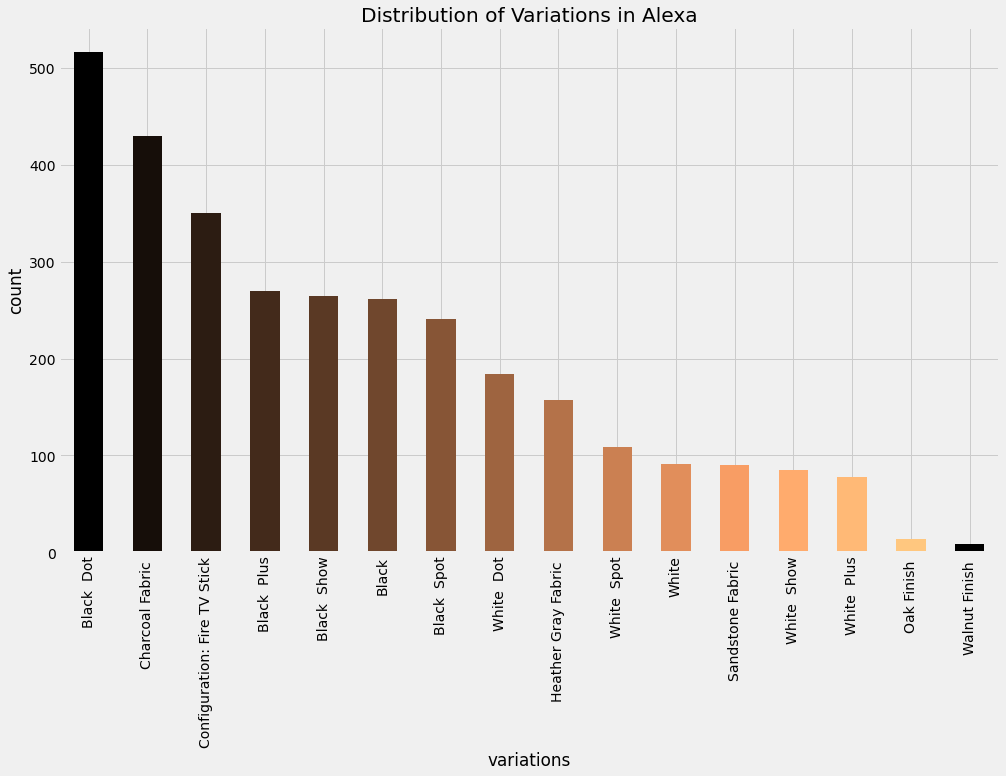

In [11]:
color = plt.cm.copper(np.linspace(0,1,15))
data['variation'].value_counts().plot.bar(color = color, figsize = (15,9))
plt.title('Distribution of Variations in Alexa')
plt.xlabel('variations')
plt.ylabel('count')
plt.show() 

Plot Bar di atas, memplot Variatios Amazon Alexa yang berbeda dengan popularitas atau jumlah mereka. Cukup jelas bahwa Black Dot adalah variasi paling populer dari Amazon Alexa dengan lebih dari 500 unit dari 3150 sampel.
Charcoal Fabric, Configuration: Fire TV Stick juga bagus dan sangat populer setelah Black Dot, Sedangkan Oak Fish dan Walnut Finish sangat tidak populer dengan kurang dari 10 entri.

In [12]:
feedback = data['feedback'].value_counts()

label_feedback = feedback.index
size_feedback = feedback.values

colors = ['red','yellow']

feedback_piechart = go.Pie(labels = label_feedback,
                         values = size_feedback,
                         marker = dict(colors= colors),
                         name = 'Alexa', hole=0.3)

df = [feedback_piechart]
layout = go.Layout(title = 'Distribution of Feedback for Alexa')

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

Di sini sekali lagi kita akan menganalisis Pie Chart yang mewakili Distribusi feedback untuk Amazon Alexa yang mengatakan bahwa 91,8% orang memberikan feedback positif ke Amazon Alexa dan hanya 8.16% orang memberikan feedback negatif ke Amazon Alexa. Ini menunjukkan bahwa Amazon Alexa adalah produk yang populer di antara begitu banyak orang dan hanya sedikit orang yang tidak menyukainya karena beberapa faktor yang tidak diketahui.

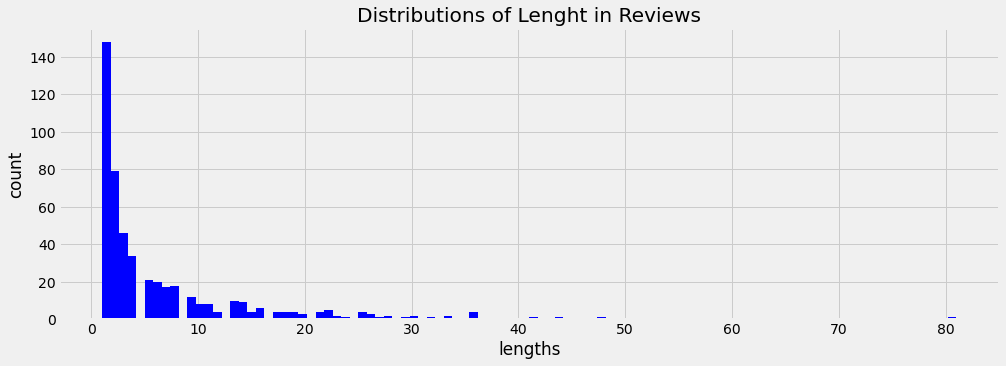

In [13]:
data['length'].value_counts().plot.hist(color = 'blue', figsize = (15,5), bins = 100)
plt.title('Distributions of Lenght in Reviews')
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

Plot Distribusi di atas, menunjukkan distribusi Panjang Ulasan yang ditulis oleh orang-orang. Ini untuk menunjukkan rata-rata berapa lama ulasan yang ditulis oleh orang-orang untuk amazon alexa. Sebagian besar Ulasan sangat pendek yang hanya satu atau dua kata lebih panjang. Kita dapat melihat bahwa kebanyakan orang menulis ulasan dengan panjang 5-20 kata.
Sangat sedikit orang yang menulis ulasan yang lebih panjang seperti 70-80 kata.

# Check some of the reviews according to their lengths
## (Mengecek panjang nya ulasan)

In [14]:
data [data['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [15]:
data [data['length'] == 30]['verified_reviews'].iloc[0]

'The speaker sounds really good'

In [16]:
data [data['length'] == 45]['verified_reviews'].iloc[0]

'Super easy set up and am loving our new Echo!'

In [17]:
data [data['length'] == 60]['verified_reviews'].iloc[0]

"Love it - am using it strictly for music now and it's great!"

In [18]:
data [data['length'] == 150]['verified_reviews'].iloc[0]

'"Love my Echo. Still learning all the things it will do. Wasn’t able to follow instructions included in the package, but found a great one on U-Tube."'

Variations vs Ratings

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



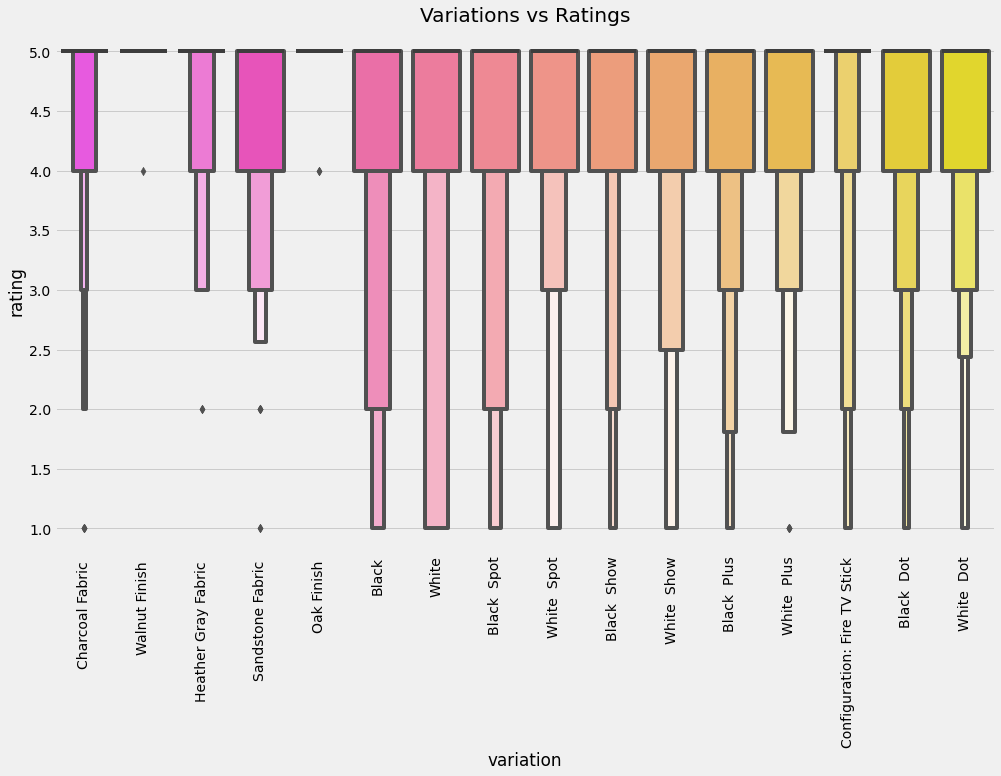

In [19]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')

sns.boxenplot(data['variation'],data['rating'],palette = 'spring')
plt.title('Variations vs Ratings')
plt.xticks(rotation = 90)
plt.show()

Bivariate plot di atas, yang memplot Variation dan ratings untuk memeriksa Variasi Amazon Alexa mana yang berkinerja terbaik dalam hal peringkat.
Walnut finish dan Oak Finish memiliki peringkat yang sangat tinggi, peringkat berkisar dari 4,5 hingga 5 yang sangat mengesankan, Variasi ini langka dan memiliki ulasan tinggi.
Variasi Putih dan Hitam untuk Amazon Alexa juga memiliki peringkat rendah, karena ini adalah variasi paling umum yang tersedia untuk produk itulah alasannya, mengapa peringkatnya bervariasi dari 0 hingga 5.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

70.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

60.9% of the points cannot be pl

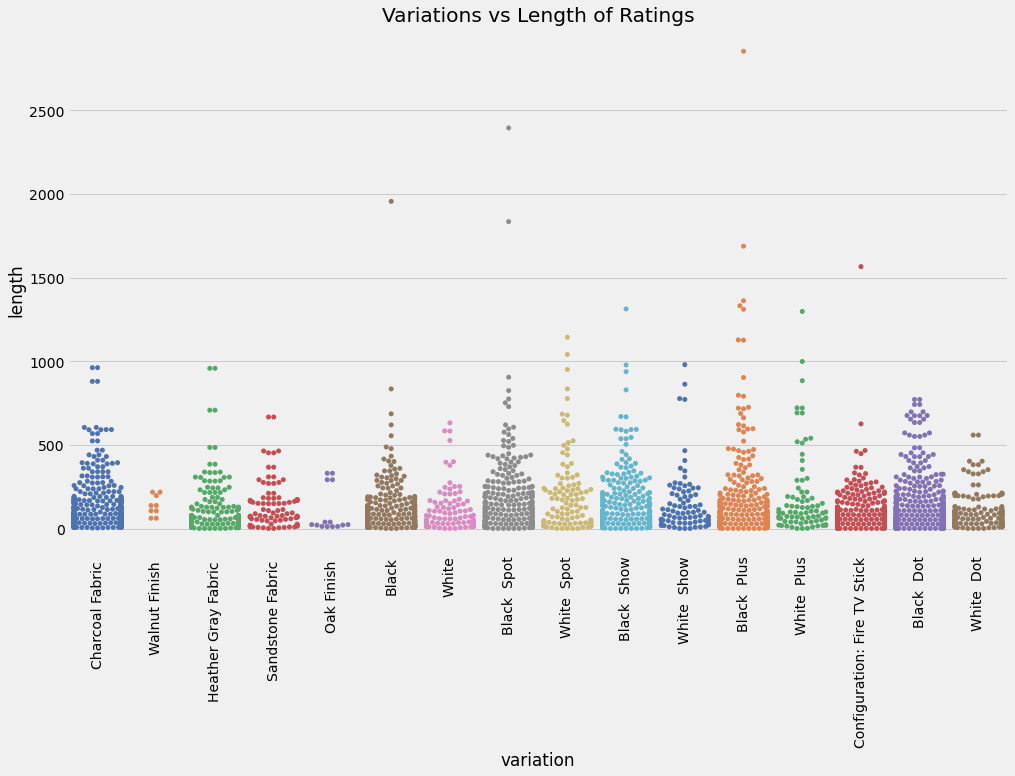

In [20]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')

sns.swarmplot(data['variation'],data['length'], palette = 'deep')
plt.title('Variations vs Length of Ratings')
plt.xlabel('variation')
plt.ylabel('length')
plt.xticks(rotation = 90)
plt.show()

 Bivariate plot di atas menunjukkan Swarmplot antara Variation di Amazon Alexa dan  panjang feedback. Kita ingin melihat variasi model mana dari orang-orang Amazon Alexa yang telah menulis ulasan terpanjang. Dengan melihat grafik, kita dapat dengan mudah melihat bahwa ulasan terpanjang ditulis untuk Black Plus. kemudian Black Spot memiliki dua review panjang dan Black memiliki satu review panjang, kami dapat menyimpulkan bahwa ulasan terpanjang semuanya ditulis untuk variasi tipe Black di Amazon Alexa.

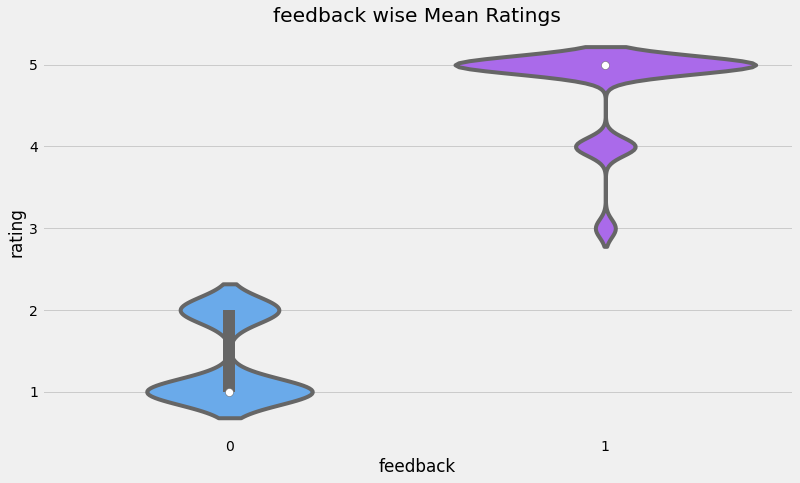

In [21]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.violinplot(data['feedback'], data['rating'], palette = 'cool')
plt.title("feedback wise Mean Ratings")
plt.show()

Bi-variate plot di atas, menunjukkan Violin plot antara Feedback dan Rating, Kita dapat dengan mudah menyimpulkan bahwa Produk yang memiliki 0 Feedback memiliki peringkat yang lebih rendah mulai dari 1 hingga 2 (mungkin Rating adalah 1) sedangkan untuk produk yang memiliki nilai umpan balik 1, memiliki peringkat mulai dari 3 hingga 5 (mungkin peringkat adalah 5).

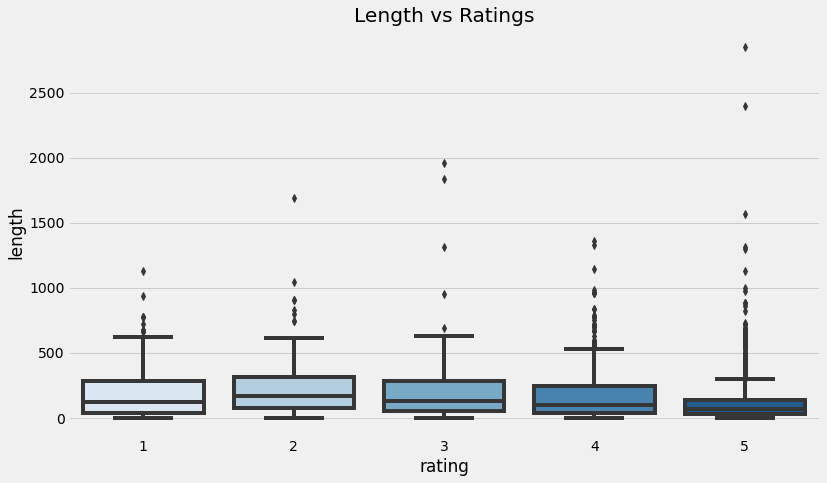

In [22]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12,7)
plt.style.use('fivethirtyeight')

sns.boxplot(data['rating'], data['length'], palette = 'Blues')
plt.title('Length vs Ratings')
plt.show()

Bivariate plot di atas menunjukkan plot antara Rating dan Length, Kita ingin mengetahui berapa banyak pengguna akan menulis jika dia akan memberikan peringkat rendah atau peringkat tinggi untuk produk.

Kita dapat melihat bahwa sebagian besar orang yang memberikan peringkat bintang 5 kepada Alexa menulis ulasan yang sangat kecil dibandingkan dengan orang-orang yang tidak memberikan peringkat bintang 5 kepada alexa.  akan tetapi, ulasan terpanjang ditulis untuk peringkat bintang 5 saja. Orang yang memberi alexa, peringkat rendah seperti peringkat bintang 1 atau 2 tidak mempertimbangkan untuk menulis ulasan yang lebih panjang mungkin karena mereka tidak menyukai produk tersebut.

<function matplotlib.pyplot.show(close=None, block=None)>

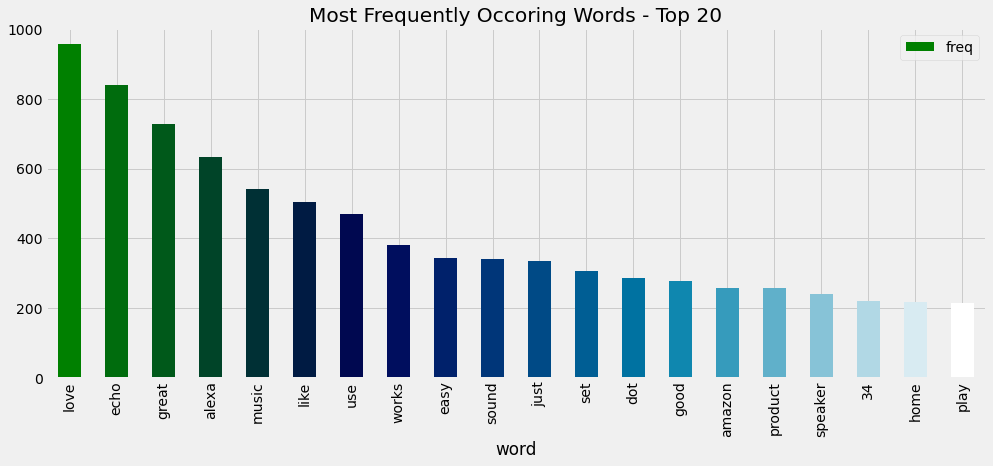

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis = 0)

word_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(word_freq, columns = ['word','freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace (0,1,20))
frequency.head(20).plot(x = 'word', y = 'freq', kind = 'bar', figsize = (15,6), color = color)
plt.title("Most Frequently Occoring Words - Top 20")
plt.show

Bar plot diatas menunjukkan kata-kata yang paling sering di review sehingga kita bisa mendapatkan gambaran kasar tentang review dan apa yang orang pikirkan tentang produk.
Kita dapat melihat bahwa love adalah kata yang paling sering muncul dalam kata yang menunjukkan bahwa sebagian besar orang sangat menyukai alexa. Kata-kata lain seperti echo, great, alexa, dll.

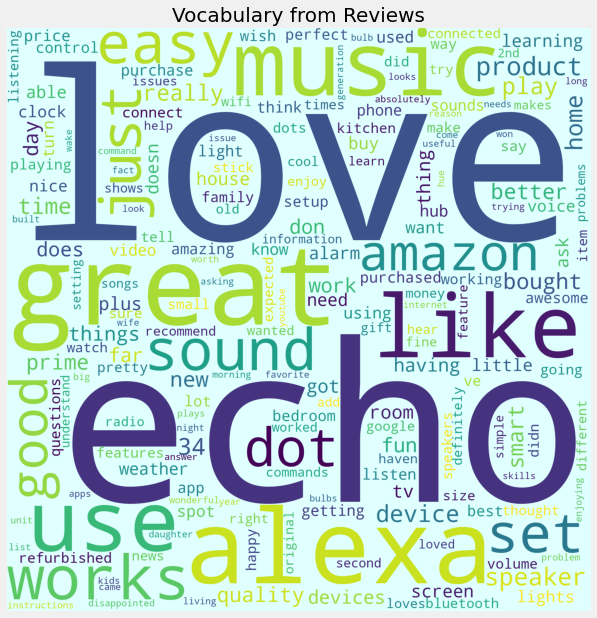

In [25]:
from wordcloud import WordCloud 

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(word_freq))
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Vocabulary from Reviews', fontsize = 20)
plt.show()


Plotting a wordscloud digunakan untuk melihat semua kata, Semakin besar kata, semakin besar frekuensi kata tersebut.

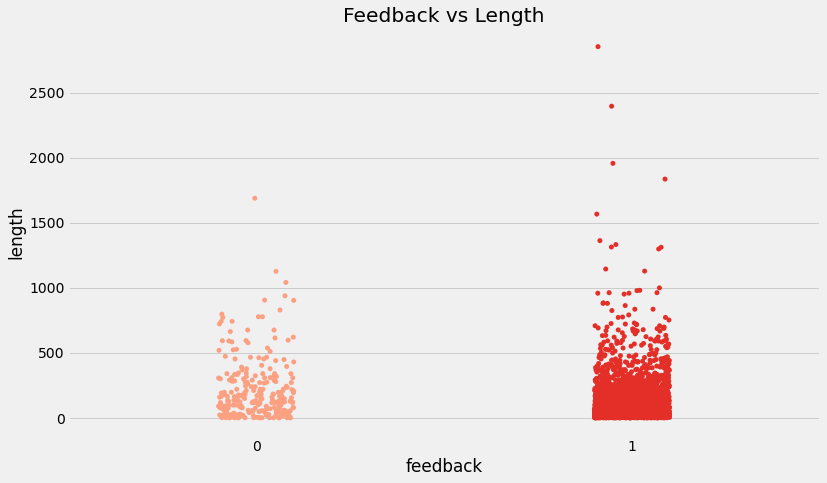

In [26]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.stripplot(data['feedback'], data['length'], palette = 'Reds')
plt.title("Feedback vs Length")
plt.show()

Rating vs Length vs Variation

In [27]:
trace = go.Scatter3d(
    x = data['length'],
    y = data['rating'],
    z = data['variation'],
    name = 'Amazon Alexa',
    mode='markers',
    marker=dict(
        size=10,
        color = data['rating'],
        colorscale = 'Viridis',))

df = [trace]

layout = go.Layout(
    title = 'Length vs Variation vs Ratings',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0))

fig = go.Figure(data = df, layout = layout)

iplot(fig)

In [32]:
# cleaning the texts
# importing the libraries for Natural Language Processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [33]:
corpus = []

for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [34]:
# creating bag of words

from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer(max_features = 2500)

In [35]:
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2205, 2500)
(2205,)
(945, 2500)
(945,)


In [37]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

Modelling

In [38]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9396825396825397
[[ 22  53]
 [  4 866]]


In [39]:
# applying k fold cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9374208144796381
Standard Variance : 0.009414889789343284


In [40]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [41]:
# applying grid search with stratified folds

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv_object = StratifiedKFold(n_splits = 2)

grid = GridSearchCV(estimator = model, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid.fit(x_train, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [42]:
print("Best Parameter Combination : {}".format(grid.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 300}


In [43]:
print("Mean Cross Validation Accuracy - Train Set : {}".format(grid.cv_results_['mean_train_score'].mean()*100))
print("Mean Cross Validation Accuracy - Validation Set : {}".format(grid.cv_results_['mean_test_score'].mean()*100))

from sklearn.metrics import accuracy_score
print("Accuracy Score for Test Set :", accuracy_score(y_test, y_pred))

Mean Cross Validation Accuracy - Train Set : 96.91065901772595
Mean Cross Validation Accuracy - Validation Set : 92.26175662645845
Accuracy Score for Test Set : 0.9396825396825397
